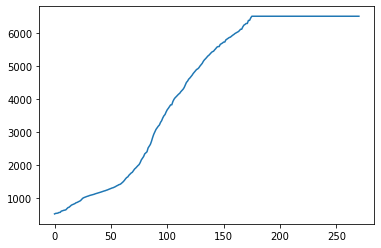

In [24]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('Covid19Data/Alger.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [25]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [26]:
dataframe = pandas.read_csv('Covid19Data/Alger.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [28]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

181 90


In [29]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [30]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [31]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [32]:

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
179/179 - 1s - loss: 0.1424
Epoch 2/100
179/179 - 0s - loss: 0.0525
Epoch 3/100
179/179 - 0s - loss: 0.0327
Epoch 4/100
179/179 - 0s - loss: 0.0200
Epoch 5/100
179/179 - 0s - loss: 0.0101
Epoch 6/100
179/179 - 0s - loss: 0.0039
Epoch 7/100
179/179 - 0s - loss: 0.0011
Epoch 8/100
179/179 - 0s - loss: 2.6297e-04
Epoch 9/100
179/179 - 0s - loss: 7.4177e-05
Epoch 10/100
179/179 - 0s - loss: 4.6208e-05
Epoch 11/100
179/179 - 0s - loss: 4.2900e-05
Epoch 12/100
179/179 - 0s - loss: 4.2425e-05
Epoch 13/100
179/179 - 0s - loss: 4.1565e-05
Epoch 14/100
179/179 - 0s - loss: 4.1566e-05
Epoch 15/100
179/179 - 0s - loss: 4.0932e-05
Epoch 16/100
179/179 - 0s - loss: 4.0787e-05
Epoch 17/100
179/179 - 0s - loss: 3.8445e-05
Epoch 18/100
179/179 - 0s - loss: 4.0141e-05
Epoch 19/100
179/179 - 0s - loss: 3.8942e-05
Epoch 20/100
179/179 - 0s - loss: 3.9010e-05
Epoch 21/100
179/179 - 0s - loss: 3.8560e-05
Epoch 22/100
179/179 - 0s - loss: 3.7944e-05
Epoch 23/100
179/179 - 0s - loss: 4.1156e-05
Ep

In [33]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 31.95 RMSE
Test Score: 35.29 RMSE


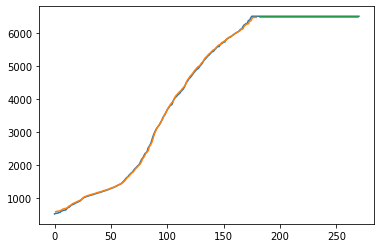

In [34]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
